In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot

In [2]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

In [3]:
frames = ed.input_file('../musicalrobot/data/PPA_Melting_6_14_19.tiff')

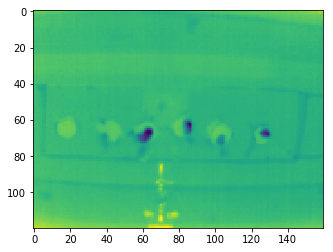

In [27]:
plt.imshow(frames[1000])

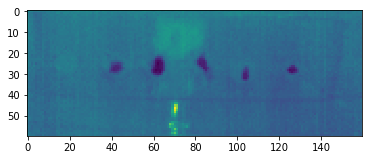

In [5]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[40:100])
plt.imshow(crop_frame[0])

In [6]:
flip_frames = ed.flip_frame(crop_frame)

In [7]:
labeled_samples = ed.edge_detection(flip_frames)

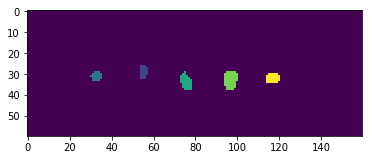

In [8]:
plt.imshow(labeled_samples)

In [9]:
regprops = ed.regprop(labeled_samples,flip_frames,5)

In [10]:
len(regprops)

1619

In [11]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
1,31.0,32.0,29465.0,42.0,23.0,15.071068,29308.0
0,28.0,55.0,29476.0,65.0,25.0,16.828427,29332.0
2,33.0,75.0,29534.0,85.0,38.0,21.485281,29329.0
3,32.0,96.0,29472.0,106.0,54.0,25.071068,29303.0
4,32.0,116.0,29513.0,126.0,32.0,18.242641,29336.0


In [12]:
# Generating data to test the code.
order = pd.DataFrame({'Row':[31,28,33,32,32,51,49,52,54,50],'Column':[32,55,75,96,116,56,77,30,118,94],'Plate':np.linspace(29000,30000,10)})

In [13]:
order

,Row,Column,Plate
0,31,32,29000.000000
1,28,55,29111.111111
2,33,75,29222.222222
3,32,96,29333.333333
4,32,116,29444.444444
5,51,56,29555.555556
6,49,77,29666.666667
7,52,30,29777.777778
8,54,118,29888.888889
9,50,94,30000.000000


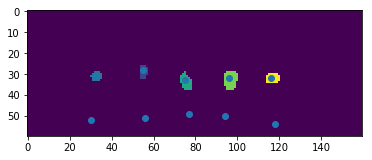

In [14]:
plt.imshow(labeled_samples)
plt.scatter(order['Column'],order['Row'])

In [15]:
order.sort_values(['Column','Row'],ascending=True,inplace=True)
# order.sort_values(['Row'],ascending=False,inplace=False)

In [17]:
n_rows = 1
n_columns = 5

In [18]:
# order_rows = []
# dfs = {}
# for j in range(0,n_columns):
#     dfs[j] = regprops[i][j*n_rows:(j+1)*n_rows]
#     dfs[j].sort_values(['Row'],inplace=True)
#     order_rows.append(dfs[j])
# order_rows = pd.concat(order_rows)
# regprops[i] = order_rows

In [34]:
import time

In [41]:
# After sorting the dataframe according by columns in ascending order.
start = time.time()
order_rows = []
dfs = {}
for j in range(len(regprops)):
    for i in range(0,n_columns):
        regprops[j].iloc[i*n_rows:(i+1)*n_rows].sort_values(['Row'],inplace=True)
end = time.time()
#     order_rows.extend(sort_rows[::-1])
#     sort_values(['Row'],inplace=True)
#     order_rows.append(dfs[i])

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [43]:
# The duration to sort all the dataframes in the regprops dictionary.
duration = end-start
print(duration)

364.4988899230957


In [21]:
for i in range(len(flip_frames)):
    assert len(regprops[i])==5,'Wrong number of samples detected'

In [23]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
1,31.0,32.0,29465.0,42.0,23.0,15.071068,29308.0
0,28.0,55.0,29476.0,65.0,25.0,16.828427,29332.0
2,33.0,75.0,29534.0,85.0,38.0,21.485281,29329.0
3,32.0,96.0,29472.0,106.0,54.0,25.071068,29303.0
4,32.0,116.0,29513.0,126.0,32.0,18.242641,29336.0


In [ ]:
regprops[0] = order_rows

In [ ]:
regprops[0]

In [ ]:
# Order is same as the pipetting order followed by the opentrons robot
# The wells are filled column wise starting from the left most column. 
# The code to sort the dataframe according to the required order involves dataframe slicing
# and hence takes a lot of time.

In [29]:
pixel_frames = ed.input_file('../musicalrobot/data/CHCl_CA_DES_5_31_19.tiff')

In [30]:
image_eq = pa.image_eq(len(pixel_frames),pixel_frames)

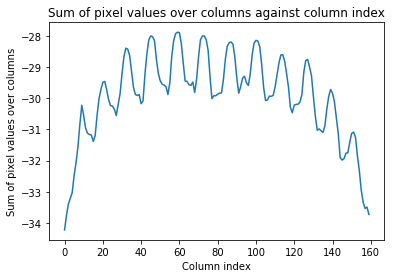

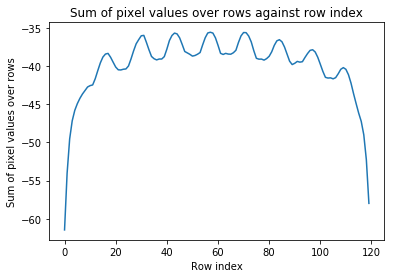

In [31]:
column_sum, row_sum = pa.pixel_sum(image_eq)

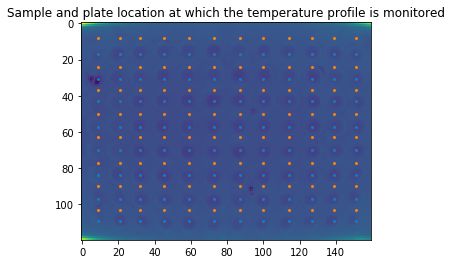

In [32]:
location = pa.peak_values(column_sum, row_sum, 12, 8, image_eq)

In [33]:
location

,Row,Column,plate_location
0,17,9,8
1,31,9,24
2,43,9,37
3,57,9,50
4,70,9,63
5,84,9,77
6,97,9,90
7,109,9,103
8,17,21,8
9,31,21,24
